In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from sklearn import preprocessing
from scipy.stats import skew, boxcox

import seaborn as sns


In [3]:
df = pd.read_csv(r"c:\Users\vishwas.balkundi\Downloads\kaggledata\fraud_detection.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

In [8]:
n_df = df.drop(['nameOrig','nameDest'],axis=1)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['type'])
n_df['type'] = le.transform(n_df['type'])
print('type', df['type'].unique())

type ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [17]:
n_df = n_df.drop(['step'],axis=1)

In [18]:
n_df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [19]:
n_df.to_csv(r'c:\Users\vishwas.balkundi\Downloads\fraud_detection_new.csv')

In [14]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(3)
memory usage: 412.6 MB


<Axes: >

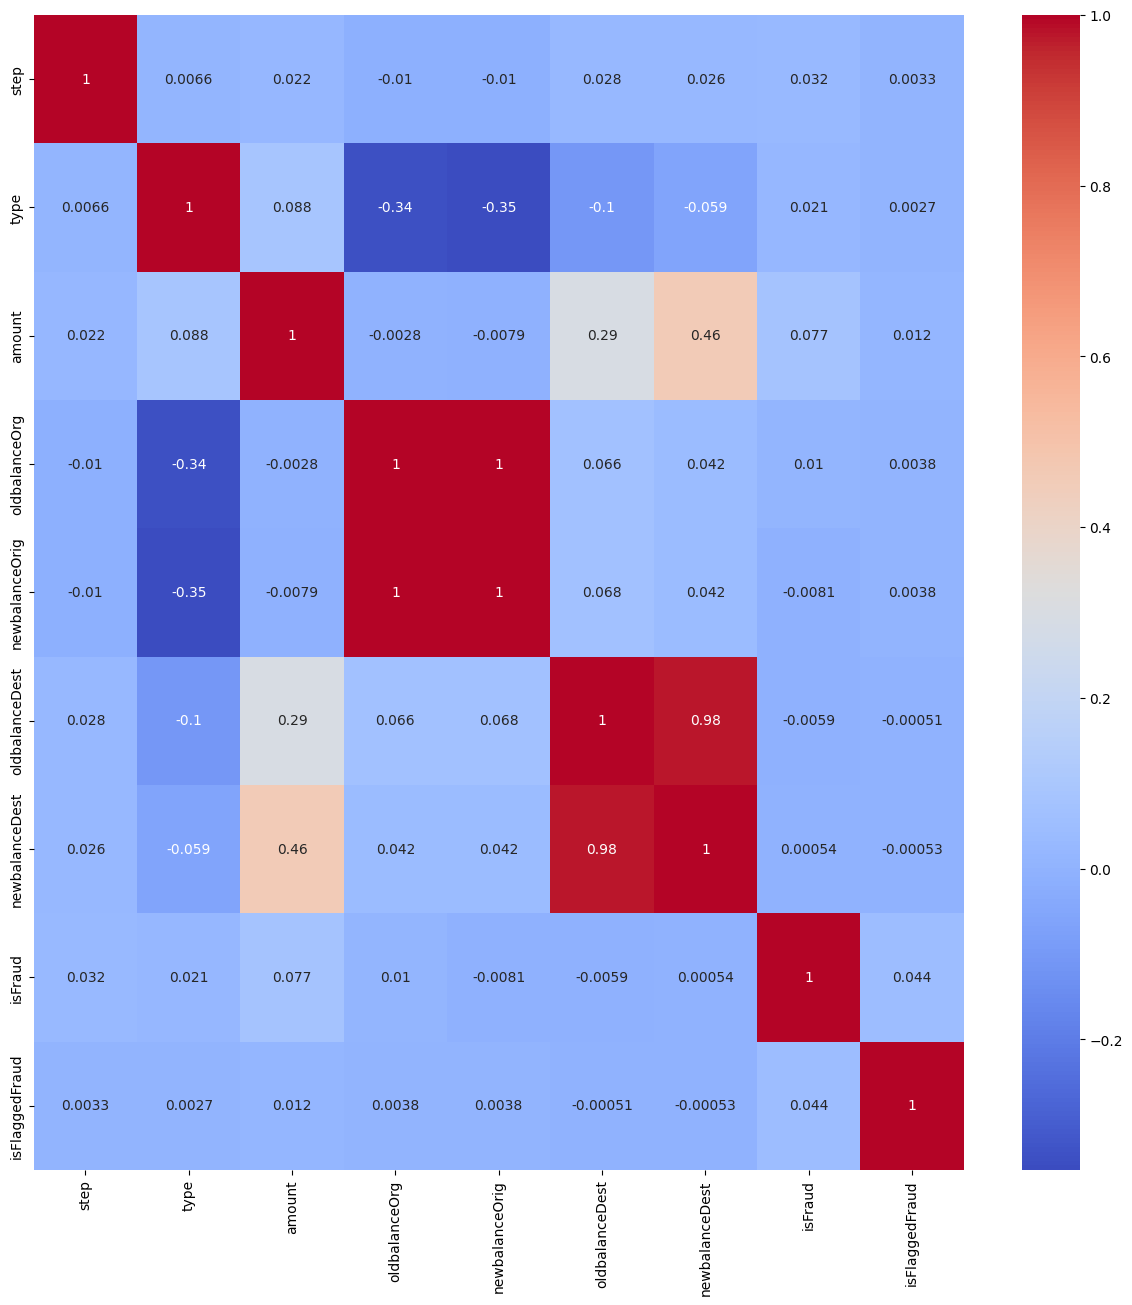

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(n_df.corr(), annot=True, cmap='coolwarm')

In [12]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [13]:
df.notna().sum()

step              6362620
type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


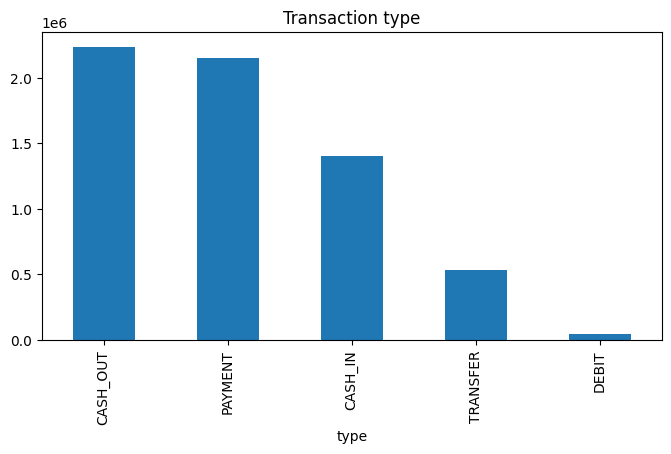

In [18]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
df.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,4))
plt.show()

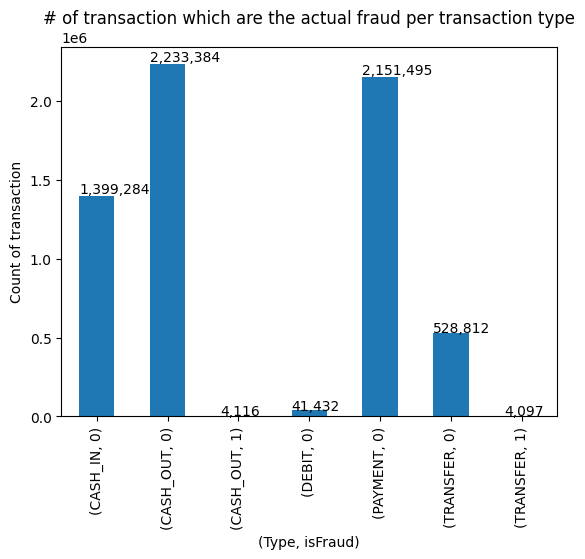

In [19]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

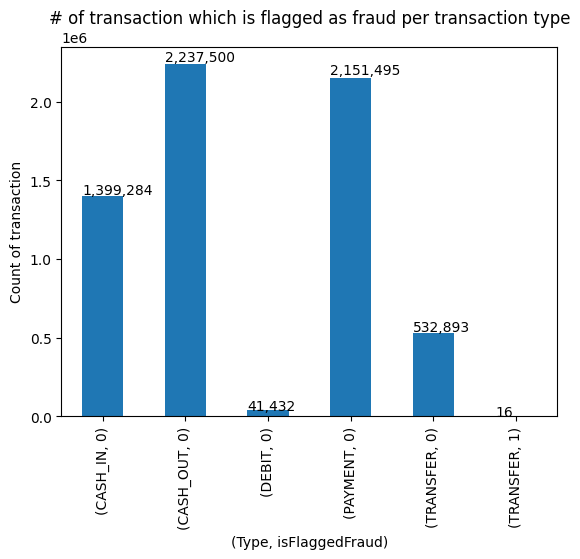

In [23]:
ax = df.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which is flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [ ]:
n_df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [21]:
from scipy import stats
# Z score
z = np.abs(stats.zscore(n_df[n_df.dtypes[n_df.dtypes != 'object'].index]))
# Removing outliers
perfect_df = n_df[(z < 3).all(axis=1)]

In [22]:
perfect_df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,170136.0,160296.36,0.00,0.00,0,0
1,3,1864.28,21249.0,19384.72,0.00,0.00,0,0
4,3,11668.14,41554.0,29885.86,0.00,0.00,0,0
5,3,7817.71,53860.0,46042.29,0.00,0.00,0,0
6,3,7107.77,183195.0,176087.23,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362319,3,8634.29,518802.0,510167.71,0.00,0.00,0,0
6362320,1,159188.22,3859.0,0.00,0.00,159188.22,0,0
6362321,1,186273.84,168046.0,0.00,24893.67,211167.51,0,0
6362322,4,82096.45,13492.0,0.00,0.00,82096.45,0,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(perfect_df.drop('type',axis=1), perfect_df['type'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=150,max_depth=30,random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))